## Analyse des données épidémiologique Covid-19 en France à l'aide de Pandas


### Ecole Supérieure de Biotechnologie de Strasbourg

### Bruno KIEFFER 

### Avril 2020


### Introduction

Nous allons mettre en oeuvre pandas pour analyser les données publiques sur l'épidémie de Covid-19 qui sévit actuellement dans le monde. Plusieurs sources d'informations publiques existent et mettent à disposition des fichiers 'tableau' de type (format .csv). Le format cvs (coma separated variable) est un [format très simple](https://fr.wikipedia.org/wiki/Comma-separated_values) qui est lu par beaucoup de logiciels. 

Sur Google, une recherche avec les mots clefs "data" "Covid-19" et "csv" permet d'identifier rapidement des données publiques. Ainsi, pour les données en France:

- https://www.data.gouv.fr/fr/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/

Deux type de données sont disponibles : 

   - L'état sanitaire par jour et par département (nombres d'hospitalisés, de décès)
   - Les nouvelles admissions par jour et par département
   - Un troisième fichier permet d'analyser la susceptibilité de la population par classe d'âge

Pour les données dans le monde:

- Johns Hopkins University Center for Systems Science and Engineering (JHU CCSE) and can be accessed from [here](https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases)


### Analyse des données France

Les fichiers du 1er Mai sont disponibles sur le Moodle :
  - donnees-hospitalieres-covid19-2020-05-01-19h00.csv
  - donnees-hospitalieres-nouveaux-covid19-2020-05-01-19h00.csv

### Lecture du fichier csv

La première étape consiste à analyser la structure des fichiers csv à l'aide d'un éditeur de texte (textedit ou pad, la commande LINUX **more xxxx.csv** fonctionne à partir du notebook Jupyter).

    * Quel est le nombre de lignes, de colonnes ?
    * Quel est le caractère utilisé pour séparer des colonnes ?
    * Quel sont les intitulés des colonnes ?
    * Que contient la colonne 'sexe' pour le fichier "donnees-hospitalieres-nouveaux-covid19-2020-05-01-19h00.csv" ?


In [22]:
more donnees-hospitalieres-nouveaux-covid19-2020-05-01-19h00.csv

In [23]:
# Mise en place des Bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## 1. Analyse des flux hospitaliers

Dans un premier temps, nous analyserons le contenu du fichier :
    
    -donnees-hospitalieres-nouveaux-covid19-2020-05-01-19h00.csv
    
Ce fichier contient les flux journaliers de patients atteint de la maladie. Il nous permet de visualiser la dynamique de l'épidémie en fonction des différents départements.

### Analyse globale

Dans un premier temps, on va calculer la somme de toutes les valeurs contenues dans les lignes pour avoir une vue globale de l'épidémie au 1er Mai 2020.

    * Interpréter les valeurs obtenues.

In [111]:
fname = "donnees-hospitalieres-nouveaux-covid19-2020-05-01-19h00.csv"
covid = pd.read_csv(fname,sep=";")
covid.sum()

dep           0101010101010101010101010101010101010101010101...
jour          2020-03-192020-03-202020-03-212020-03-222020-0...
incid_hosp                                                96016
incid_rea                                                 15953
incid_dc                                                  15611
incid_rad                                                 52443
dtype: object

On souhaite maintenant avoir cette somme par département. Pour cela, on va réaliser une opération de regroupement des lignes selon la valeur d'une colonne particulière, ici, le département. Cette opération est réalisée par la fonction pandas [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

Lorsque l'on regroupe des lignes en une seule,  il faut indiquer l'opération à effectuer pour obtenir une valeur unique à partir des différentes valeurs regroupées, pour chaque colonne, par exemple une somme. C'est le rôle de la fonction agg (aggregate). 

La ligne suivante regroupe les lignes du tableau covid par valeur du département. Notez que le département devient l'index du tableau.

    * Quel est le département le plus touché par l'épidémie au 1er Mai ?
    * Quelle a été le nombre maximal de décès enregistrés en une journée, et dans quel département ?

In [26]:
dep = covid.groupby(by='dep').agg('sum')

In [32]:
# Réponses
# On trie le tableau dep:
deps = dep.sort_values('incid_dc')

# On sort la valeur maximale
dep2 = covid.groupby(by='dep').agg('max')
dep2s = dep2.sort_values('incid_dc')

### Recherche de données

Pour atteindre des données particulières dans le tableau, il est nécessaire de se familiariser avec les techniques de sélection. Par exemple, la ligne suivante sélectionne l'ensemble des données du 1er Mai. Les sélections peuvent être combinées à l'aide des opérateurs booléens (et : &, ou : |).

    * Comparez les admissions à l'hopital au 20 Mars pour le Haut-Rhin et le Bas-Rhin, puis au 1er Mai

In [64]:
covid[(covid['jour']=="2020-05-01") & (covid['dep']=="68")]

,dep,jour,incid_hosp,incid_rea,incid_dc,incid_rad
2947,68,2020-05-01,19,2,2,36


### Représentation des données

Afin de comparer l'état de l'épidémie dans le territoire, on va représenter graphiquement (sous forme d'histogramme) le nombre total de patients hospitalisés entre le 20 Mars (début du comptage) et le 1er Mai. Ceci peut être réalisé directement par la fonction plot(), associée à un dataframe pandas.

On ne représentera que les 50 départements les plus touchés

<IPython.core.display.Javascript object>


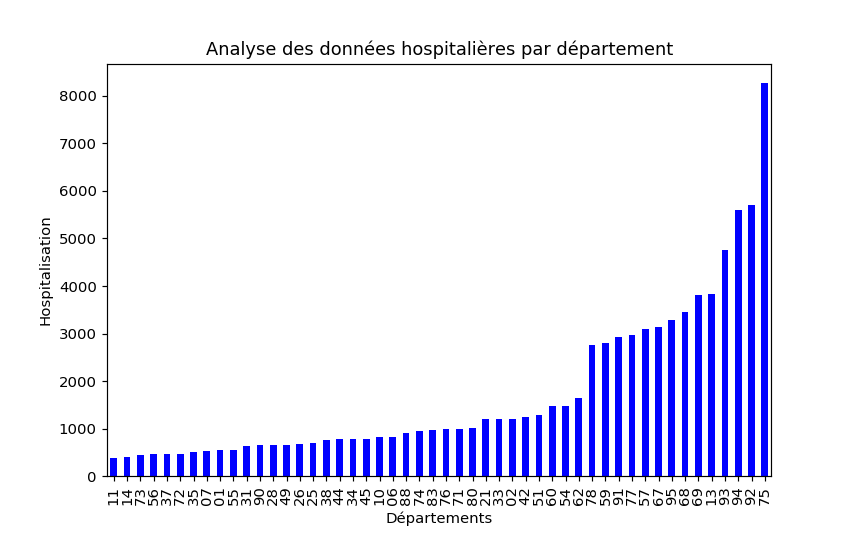

Text(0.5, 1.0, 'Analyse des données hospitalières par département')

In [89]:
# On trie le tableau
deps = deps.sort_values('incid_hosp')
# Sélection des 50 dernières lignes et de la colonne 'indic_hosp'
deps50 = deps['incid_hosp'][-50:]

# Trace de la figure
fig, ax = plt.subplots(figsize=(8,5))

deps50.plot(kind='bar',color='blue',ax=ax)
ax.set_xlabel('Départements')
ax.set_ylabel('Hospitalisation')
ax.set_title('Analyse des données hospitalières par département')

### Calculs sur le tableau

On souhaite effectuer des calculs sur les tableau et ajouter le résultat de ces calculs dans une nouvelle colonne. Par exemple, on souhaite avoir une idée de l'évolution de l'épidémie en calculant la différence d'admissions dans les services de réanimation d'un département entre le 20 Avril et le 1er Mai 2020.

Deux tableaux vont être créés pour chacune des deux dates, puis réassemblées sur la base du numéro de département à l'aide de l'opération [**merge**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html). On pourra de cette façon calculer la différence entre les colonnes correspondant aux deux dates différentes.

    * Modifier le script suivant afin de calculer une variation relative

In [109]:
# Extraction des deux sous-tableaux
avril = covid[covid['jour']=="2020-04-20"]
mai =  covid[covid['jour']=="2020-05-01"]

# Fusion des tableaux
diff = mai.merge(avril,on = 'dep', how = 'inner')
# On ajoute une colonne qui contient le résultat du calcul
diff['var'] = diff['incid_rea_x'] - diff['incid_rea_y']

# On ne retient du tableau que les colonnes intéressantes
diff = diff[['dep','var']]
diff.set_index('dep')
diff.sort_values('var').head()

,dep,var
12,13,-20
92,94,-11
73,75,-9
89,91,-8
32,34,-7


### Croisement de données

La fonction merge est très utile pour comparer des données issues de sources différentes. Par exemple, la comparaison de l'épidémie par département n'a de sens que lorsque l'on peut ramener le nombre de malades à la population du département. Le fichier :

    departements-francais.csv

contient les données de population par département.
Le script suivant lit le fichier et calcule la fraction de la population touchée par le virus (la prévalence).

In [112]:
fname = "departements-francais.csv"
departements = pd.read_csv(fname,sep="\t")
# On change le nom des colonnes pour simplifier leur manipulation (pas d'accents)
departements.columns = ['dep','nom,','region','chef-lieu','superficie','population','densite']

<IPython.core.display.Javascript object>


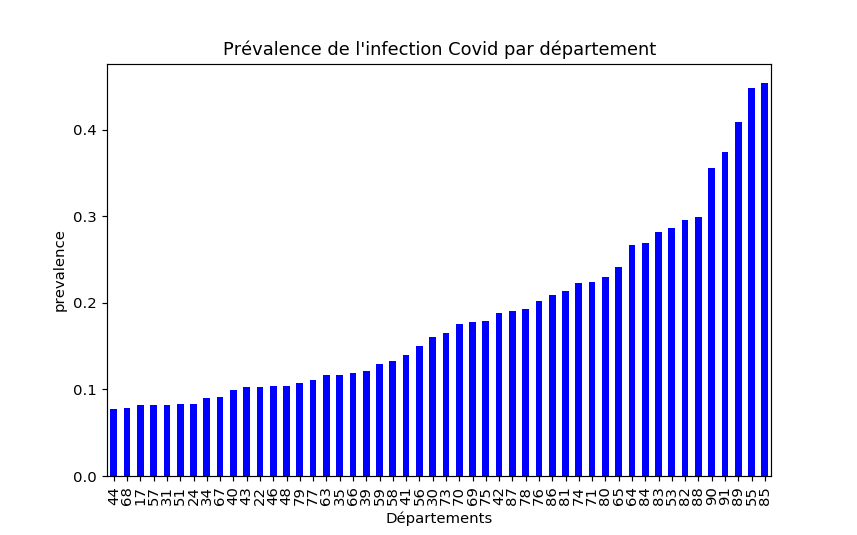

Text(0.5, 1.0, "Prévalence de l'infection Covid par département")

In [139]:
# Fusion des tableaux
incid = deps.merge(departements,on ='dep')
# Calcul de la prevalence
incid['preval'] = 100*incid['incid_hosp']/incid['population']
incid = incid.sort_values('preval')

incid50 = incid['preval'][-50:]

# Trace de la figure
fig, ax = plt.subplots(figsize=(8,5))

incid50.plot(kind='bar',color='blue',ax=ax)
ax.set_xlabel('Départements')
ax.set_ylabel('prevalence')
ax.set_title("Prévalence de l'infection Covid par département")

## 2. Comparaison des données Hommes/Femmes

On souhaite vérifier si le virus affecte d'avantage les hommes ou les femmes. Pour cela, on utiliseras le fichier:

  - donnees-hospitalieres-covid19-2020-05-01-19h00.csv

Ce fichier contient une colonne supplémentaire qui permet de distinguer le genre (1) pour les hommes (2) pour les femmes. 


In [141]:
# Lecture du fichier
fname = "donnees-hospitalieres-covid19-2020-05-01-19h00.csv"
covid = pd.read_csv(fname,sep=";")
covid.head()

,dep,sexe,jour,hosp,rea,rad,dc
0,01,0,2020-03-18,2,0,1,0
1,01,1,2020-03-18,1,0,1,0
2,01,2,2020-03-18,1,0,0,0
3,02,0,2020-03-18,41,10,18,11
4,02,1,2020-03-18,19,4,11,6


Afin de comparer la prévalence sur les populations masculines et féminines, on va regrouper l'ensemble des lignes correspondant à un genre

In [145]:
genre = covid.groupby(by='sexe').agg('max')
genre

,jour,hosp,rea,rad,dc
sexe,,,,,
0,2020-05-01,3281,855,4146,1471
1,2020-05-01,1894,634,2395,929
2,2020-05-01,1364,220,1727,536


## 3. Analyse de séries temporelles

On souhaite ici analyser l'évolution de l'épidémie dans le temps. Pour cela, on va extraire pour chaque département l'ensemble des valeurs obtenues pour une des variables, par exemple les hospitalisations. Il s'agit donc de transformer le tableau de façon à ce que les différentes dates se retrouvent en entêtes des colonnes. Cette opération est appelée [**pivot**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html). 

In [148]:
# On reprend le fichier des nouveaux cas 
fname = "donnees-hospitalieres-nouveaux-covid19-2020-05-01-19h00.csv"
covid = pd.read_csv(fname,sep=";")
covid.head()

,dep,jour,incid_hosp,incid_rea,incid_dc,incid_rad
0,01,2020-03-19,1,0,0,0
1,01,2020-03-20,0,0,0,1
2,01,2020-03-21,4,0,0,0
3,01,2020-03-22,3,1,0,1
4,01,2020-03-23,14,1,0,5


In [155]:
# Opération de pivot
covid_temps = covid.pivot(index = 'dep', columns = 'jour', values = 'incid_hosp')

<IPython.core.display.Javascript object>


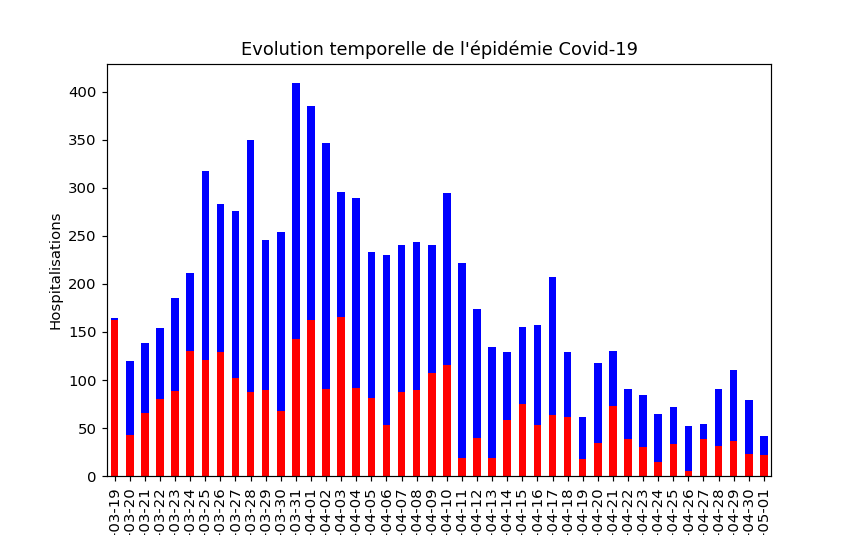

Text(0.5, 1.0, "Evolution temporelle de l'épidémie Covid-19")

In [161]:
# Comparaison de deux départements
fig, ax = plt.subplots(figsize=(8,5))

covid_temps.loc['75'].plot(kind='bar',color='blue', ax = ax)
covid_temps.loc['67'].plot(kind='bar',color='red', ax = ax)

ax.set_ylabel('Hospitalisations')
ax.set_title("Evolution temporelle de l'épidémie Covid-19")

<IPython.core.display.Javascript object>


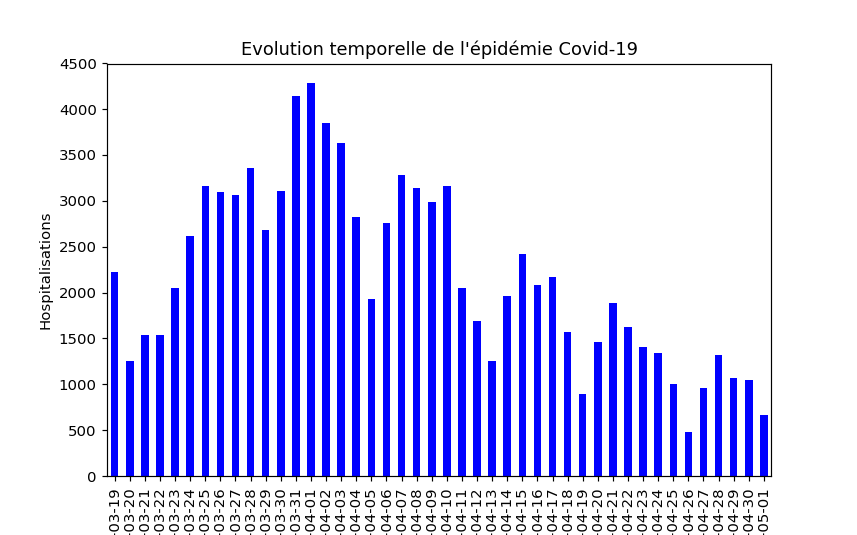

Text(0.5, 1.0, "Evolution temporelle de l'épidémie Covid-19")

In [162]:
# Evolution temporelle sur la France
covid_fr = covid_temps.sum()

# Comparaison de deux départements
fig, ax = plt.subplots(figsize=(8,5))

covid_fr.plot(kind='bar',color='blue', ax = ax)

ax.set_ylabel('Hospitalisations')
ax.set_title("Evolution temporelle de l'épidémie Covid-19")